<a href="https://colab.research.google.com/github/Ashishkumarpanda/Hackerearth-ML-Challenge/blob/main/Predict_the_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Hackerearth/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Hackerearth/test.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15,16,17,18,19,20,22,23,24,25,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_train.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,issue.1,issue.10,issue.11,issue.12,issue.13,issue.14,issue.15,issue.16,issue.17,issue.18,issue.19,issue.2,issue.20,issue.21,issue.22,issue.23,issue.24,issue.25,issue.26,issue.3,issue.4,issue.5,issue.6,issue.7,issue.8,issue.9,itemid,judgementdate,kpdate,languageisocode,...,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-92699,28/05/2009,28/05/2009,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-184490,10/07/2018,10/07/2018,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-113810,18/10/2012,18/10/2012,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-141929,25/03/2014,25/03/2014,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-94585,01/10/2009,01/10/2009,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4


In [ ]:
df_test.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,issue.1,issue.10,issue.11,issue.12,issue.13,issue.14,issue.15,issue.16,issue.17,issue.18,issue.19,issue.2,issue.20,issue.21,issue.22,issue.23,issue.24,issue.25,issue.26,issue.3,issue.4,issue.5,issue.6,issue.7,issue.8,issue.9,itemid,judgementdate,kpdate,languageisocode,...,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,1194/04,MS WORD,mk,North Macedonia,NaN,"CASE OF CAMINSKI v. ""THE FORMER YUGOSLAV REPUB...",COMMITTEE,ECLI:CE:ECHR:2011:0224JUD000119404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-103613,24/02/2011,24/02/2011,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,53865/11,MS WORD,ua,Ukraine,NaN,CASE OF KUSHCH v. UKRAINE,CHAMBER,ECLI:CE:ECHR:2015:1203JUD005386511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-158963,03/12/2015,03/12/2015,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,43838/07,MS WORD,ie,Ireland,NaN,CASE OF O. v. IRELAND,COMMITTEE,ECLI:CE:ECHR:2012:0119JUD004383807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-108659,19/01/2012,19/01/2012,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,11157/04,MS WORD,ru,Russian Federation,NaN,CASE OF ANCHUGOV AND GLADKOV v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2013:0704JUD001115704,NaN,"Articles 32-33,134 and 135 of the Constitution",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-122260,04/07/2013,04/07/2013,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42443/02,MS WORD,ru,Russian Federation,NaN,CASE OF EMINBEYLI v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0226JUD004244302,NaN,"Articles 1, 11, 89, 96 and 122 of the Code of ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001-91447,26/02/2009,26/02/2009,ENG,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
columns = []
for i in df_train.columns:
  columns.append(i)
columns

['appno',
 'application',
 'country.alpha2',
 'country.name',
 'decisiondate',
 'docname',
 'doctypebranch',
 'ecli',
 'introductiondate',
 'issue.0',
 'issue.1',
 'issue.10',
 'issue.11',
 'issue.12',
 'issue.13',
 'issue.14',
 'issue.15',
 'issue.16',
 'issue.17',
 'issue.18',
 'issue.19',
 'issue.2',
 'issue.20',
 'issue.21',
 'issue.22',
 'issue.23',
 'issue.24',
 'issue.25',
 'issue.26',
 'issue.3',
 'issue.4',
 'issue.5',
 'issue.6',
 'issue.7',
 'issue.8',
 'issue.9',
 'itemid',
 'judgementdate',
 'kpdate',
 'languageisocode',
 'originatingbody',
 'originatingbody_name',
 'originatingbody_type',
 'parties.0',
 'parties.1',
 'parties.2',
 'rank',
 'respondent.0',
 'respondent.1',
 'respondent.2',
 'respondent.3',
 'respondent.4',
 'respondentOrderEng',
 'separateopinion',
 'sharepointid',
 'typedescription',
 'article=3',
 'article=6',
 'article=P1',
 'article=5',
 'article=8',
 'article=13',
 'article=10',
 'article=2',
 'article=34',
 'article=41',
 'article=38',
 'article=35',

In [ ]:
null_columns = []
all_null_values = []
for i in columns:
  if df_train[i].isnull().any() == True:
    null_columns.append(i)
  elif df_train[i].isnull().all() == True:
    all_null_values.append(i)

In [ ]:
null_columns

['decisiondate',
 'introductiondate',
 'issue.0',
 'issue.1',
 'issue.10',
 'issue.11',
 'issue.12',
 'issue.13',
 'issue.14',
 'issue.15',
 'issue.16',
 'issue.17',
 'issue.18',
 'issue.19',
 'issue.2',
 'issue.20',
 'issue.21',
 'issue.22',
 'issue.23',
 'issue.24',
 'issue.25',
 'issue.26',
 'issue.3',
 'issue.4',
 'issue.5',
 'issue.6',
 'issue.7',
 'issue.8',
 'issue.9',
 'parties.1',
 'parties.2',
 'respondent.1',
 'respondent.2',
 'respondent.3',
 'respondent.4']

In [ ]:
for i in null_columns:
  print("total number of null values in",i,"=",df_train[i].isnull().sum())

total number of null values in decisiondate = 8202
total number of null values in introductiondate = 8202
total number of null values in issue.0 = 6630
total number of null values in issue.1 = 7693
total number of null values in issue.10 = 8857
total number of null values in issue.11 = 8861
total number of null values in issue.12 = 8863
total number of null values in issue.13 = 8866
total number of null values in issue.14 = 8868
total number of null values in issue.15 = 8871
total number of null values in issue.16 = 8874
total number of null values in issue.17 = 8875
total number of null values in issue.18 = 8876
total number of null values in issue.19 = 8876
total number of null values in issue.2 = 8239
total number of null values in issue.20 = 8876
total number of null values in issue.21 = 8876
total number of null values in issue.22 = 8876
total number of null values in issue.23 = 8876
total number of null values in issue.24 = 8877
total number of null values in issue.25 = 8877
tota

In [ ]:
df_train.shape

(8878, 328)

In [ ]:
df_train['parties.1'].fillna('Not Avialable',inplace = True)

In [ ]:
for i in null_columns:
  if i == 'parties.1':
    null_columns.remove(i)

In [ ]:
df_train.drop(labels=null_columns,axis =1,inplace=True)
#df_test.drop(labels=null_columns,axis =1,inplace=True)

In [ ]:
df_train.head()

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,parties.1,rank,respondent.0,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,...,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,001-92699,28/05/2009,28/05/2009,ENG,4,First Section,Court,KOKOSHKINA,RUSSIA,685.417419,RUS,38,False,349418,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,001-184490,10/07/2018,10/07/2018,ENG,26,Second Section Committee,Court,ÖZCAN,TURKEY,2641.901855,TUR,47,False,476616,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,001-113810,18/10/2012,18/10/2012,ENG,23,Fith Section,Court,DANIJEL PEČNIK,SLOVENIA,942.213440,SVN,43,True,373194,15,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,001-141929,25/03/2014,25/03/2014,ENG,5,Second Section,Court,PALANCI,SWITZERLAND,1121.770142,CHE,46,True,392525,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,001-94585,01/10/2009,01/10/2009,ENG,4,First Section,Court,AMANAT ILYASOVA AND OTHERS,RUSSIA,704.821594,RUS,38,False,423100,15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4


In [ ]:
y = df_train['importance']
y.shape

(8878,)

In [ ]:
df_train.shape

(8878, 294)

In [ ]:
x = df_train.iloc[:,0:293]
x.drop('parties.1',axis = 1,inplace=True)
x.drop('respondent.0',axis = 1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
np.unique(y)

array([1, 2, 3, 4])

In [ ]:
x_columns = []
for i in x.columns:
  x_columns.append(i)

for i in x_columns:
  x[i] = le.fit_transform(x[i])

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.feature_importances_

array([0.00307948, 0.        , 0.01545067, 0.00707036, 0.00241158,
       0.06731004, 0.04682408, 0.00740534, 0.00288372, 0.        ,
       0.        , 0.01968541, 0.0097517 , 0.        , 0.00085062,
       0.01981024, 0.00747206, 0.05626455, 0.04227755, 0.01122741,
       0.00381896, 0.00401017, 0.00344742, 0.        , 0.00778268,
       0.        , 0.        , 0.00386023, 0.01007893, 0.12436118,
       0.        , 0.0880785 , 0.00603871, 0.02389644, 0.00941868,
       0.        , 0.        , 0.0037854 , 0.00524725, 0.00743451,
       0.00600565, 0.        , 0.        , 0.0042311 , 0.        ,
       0.00318762, 0.00863882, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01866805, 0.     

<BarContainer object of 293 artists>

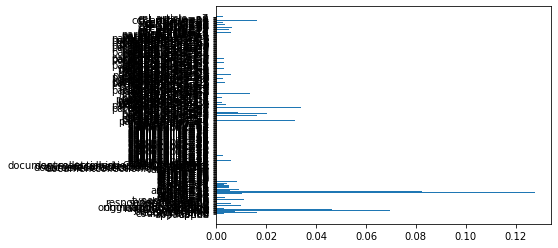

In [ ]:
plt.barh(x.columns, xgb.feature_importances_)

In [ ]:
df_test.head(2)

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,parties.1,rank,respondent.0,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,...,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,189,0,31,30,679,1,2458,194,1187,1187,0,12,4,0,664,"""THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA""",794.766724,MKD,33,False,359124,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3561,0,45,44,2246,0,3514,1249,128,128,0,7,3,0,2210,UKRAINE,1448.891235,UKR,48,False,435683,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_train['appno'][2438] = '12772/06'

df_train['appno'][2438]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


'12772/06'

In [ ]:
df_test.drop(labels=null_columns,axis = 1,inplace=True)

In [ ]:
df_test.drop('parties.1',axis = 1,inplace=True)
df_test.drop('respondent.0',axis = 1,inplace=True)

In [ ]:
df_test.head(2)

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,rank,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,...,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,189,0,31,30,679,1,2458,194,1187,1187,0,12,4,0,664,794.766724,33,False,359124,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3561,0,45,44,2246,0,3514,1249,128,128,0,7,3,0,2210,1448.891235,48,False,435683,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
prediction = xgb.predict(x)

In [ ]:
prediction

array([4, 4, 4, ..., 4, 3, 4])

In [ ]:
data = {'appno':df_train['appno'],'importance':prediction}
df = pd.DataFrame(data)
df.head()

,appno,importance
0,2052/08,4
1,4728/07,4
2,44135/06,4
3,2607/08,4
4,27001/06,4


In [ ]:
d = df.head().to_csv("Submission-4.csv",index = False)